<a href="https://colab.research.google.com/github/castorhyun/DeepLearningZeroToAll/blob/master/fund_prediction_resvamt_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/Colab Notebooks/0011.데이터모델링/Data_2017

/content/gdrive/My Drive/Colab Notebooks/0011.데이터모델링/Data_2017


라이브러리 import


In [0]:
import pandas as pd


In [0]:
data_in = pd.read_csv("cvt_201701.csv")
data_in = pd.concat([data_in, pd.read_csv("cvt_201702.csv")], ignore_index=True)

In [0]:
data_in.head()

,sno,age,postno,trxMM,sincdt,early_cnt,mid_cnt,late_cnt,resv_amt,cnt,A0_cnt,C0_cnt,CK_cnt,D0_cnt,DT_cnt,G0_cnt,jibul_psb_jan,jan,bfmm_ac_jan,m_avjn,bfmm_ac_avjn,lm3_ac_avjn,lm6_ac_avjn,lm12_ac_avjn,jibul_psb_jan_1,jan_1,bfmm_ac_jan_1,m_avjn_1,bfmm_ac_avjn_1,lm3_ac_avjn_1,lm6_ac_avjn_1,lm12_ac_avjn_1
0,2577,48,28696,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16996,1704570,207356,254474,401483,290049,351430,273399
1,5214,42,11776,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2756388,1936892,1858233,3805573,3518152,3712840,4123438,4393251
2,6559,25,21988,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3217980,831151,1191239,416157,746375,1261631,730455
3,7694,55,28511,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16954023,7817629,8348041,6587579,8024913,7208232,7328595,7848239
4,6376,44,42908,거래없음,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3109041,126702,188095,248065,265718,442455,523083,417348


In [6]:
from tqdm import tqdm

# 각 거래채널별 거래건수를 합산 - 거래가 있는 경우 1 , 없으면 0
trx_cnt = list(data_in['A0_cnt'] + data_in['C0_cnt'] + data_in['CK_cnt'] + data_in['D0_cnt'] + data_in['DT_cnt'] + data_in['G0_cnt'])

ip_yn = []

for i in tqdm(range(len(trx_cnt))):
  if trx_cnt[i] > 0:
    ip_yn.append(1)
  else:
    ip_yn.append(0)


data_in['ip_yn'] = ip_yn

100%|██████████| 763312/763312 [00:00<00:00, 2301179.91it/s]


In [0]:
trx_data = data_in[data_in['ip_yn'] == 1]

trx_data_ud100 = trx_data[trx_data['resv_amt'] < 1000000 ]




In [43]:
trx_data_ud100

,sno,age,postno,trxMM,sincdt,early_cnt,mid_cnt,late_cnt,resv_amt,cnt,A0_cnt,C0_cnt,CK_cnt,D0_cnt,DT_cnt,G0_cnt,jibul_psb_jan,jan,bfmm_ac_jan,m_avjn,bfmm_ac_avjn,lm3_ac_avjn,lm6_ac_avjn,lm12_ac_avjn,jibul_psb_jan_1,jan_1,bfmm_ac_jan_1,m_avjn_1,bfmm_ac_avjn_1,lm3_ac_avjn_1,lm6_ac_avjn_1,lm12_ac_avjn_1,ip_yn
18,3925,27,5118,201701,20170118,1,0,0,50000,1,0,0,0,0,1,0,0,42294,81532,99841,125701,129017,123529,100314,0,42294,81532,99841,125701,129017,123529,100314,1
19,463,38,57926,201701,20170105,1,0,0,31000,1,0,0,0,0,1,0,0,239471,342689,425600,243088,350376,805613,2237707,0,239471,342689,425600,243088,350376,805613,2237707,1
30,766,37,4374,201701,20170120,1,0,0,10000,1,0,0,0,0,1,0,0,0,0,213465,87824,173485,693535,474134,0,0,0,213465,87824,173485,693535,474134,1
49,2975,25,46970,201701,20170109,1,0,0,10000,1,0,0,0,0,1,0,0,5014366,4493180,5097006,4133194,4341241,3553362,2422267,0,5014366,4493180,5097006,4133194,4341241,3553362,2422267,1
74,9179,45,11633,201701,20170104,1,0,0,100000,1,0,0,0,0,1,0,7407,57120,91333,55070,83748,63508,95057,149414,7407,57120,91333,55070,83748,63508,95057,149414,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763286,761,24,31906,201702,20170209,1,0,0,13200,1,0,0,0,0,1,0,0,2844121,0,851629,0,264951,131744,65330,0,2844121,0,851629,0,264951,131744,65330,1
763287,1618,47,7209,201702,20170206,1,0,0,100000,1,1,0,0,0,0,0,0,4930851,71613,2305691,19164,751736,403074,237454,0,4930851,71613,2305691,19164,751736,403074,237454,1
763292,8521,32,7621,201702,20170207,1,0,0,500000,1,0,0,0,1,0,0,0,506466,5218882,515951,1558454,1119535,1090957,882326,0,506466,5218882,515951,1558454,1119535,1090957,882326,1
763307,8230,24,58746,201702,20170203,1,0,0,34997,1,0,0,0,0,1,0,0,4676119,7070399,4471468,5990576,6210590,5481041,2933681,0,4676119,7070399,4471468,5990576,6210590,5481041,2933681,1


In [0]:
# 학습데이터 만들기 ver.1
# 전체데이터 

x_train = pd.DataFrame()
y_train = pd.DataFrame()

x_train['sno'] = trx_data_ud100['sno']
x_train['age'] = trx_data_ud100['age']
x_train['postno'] = trx_data_ud100['postno']

x_train['jibul_psb_jan'] = trx_data_ud100['jibul_psb_jan']
x_train['jan'] = trx_data_ud100['jan']
x_train['bfmm_ac_jan'] = trx_data_ud100['bfmm_ac_jan']
x_train['m_avjn'] = trx_data_ud100['m_avjn']
x_train['bfmm_ac_avjn'] = trx_data_ud100['bfmm_ac_avjn']
x_train['lm3_ac_avjn'] = trx_data_ud100['lm3_ac_avjn']


y_train = trx_data_ud100['resv_amt']

In [31]:
y_train.value_counts()

100000    15735
200000     4825
300000     2861
50000      2436
10000      2183
          ...  
16571         1
34978         1
75926         1
59502         1
10245         1
Name: resv_amt, Length: 3526, dtype: int64

In [45]:
x_train

,sno,age,postno,jibul_psb_jan,jan,bfmm_ac_jan,m_avjn,bfmm_ac_avjn,lm3_ac_avjn
18,3925,27,5118,0,42294,81532,99841,125701,129017
19,463,38,57926,0,239471,342689,425600,243088,350376
30,766,37,4374,0,0,0,213465,87824,173485
49,2975,25,46970,0,5014366,4493180,5097006,4133194,4341241
74,9179,45,11633,7407,57120,91333,55070,83748,63508
...,...,...,...,...,...,...,...,...,...
763286,761,24,31906,0,2844121,0,851629,0,264951
763287,1618,47,7209,0,4930851,71613,2305691,19164,751736
763292,8521,32,7621,0,506466,5218882,515951,1558454,1119535
763307,8230,24,58746,0,4676119,7070399,4471468,5990576,6210590


In [0]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

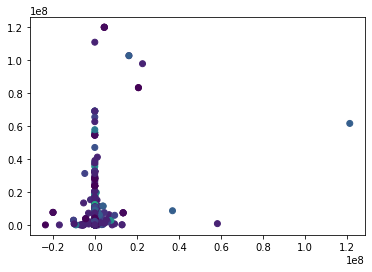

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

# 데이터셋 확인 (2차원)
#plot_x = x_train_np[:,0]
#plot_y = x_train_np[:,1]
#plot_color = y_train_np.reshape(381656,)

plot_x = x_train_np[:1000,3]
plot_y = x_train_np[:1000,4]
plot_color = y_train_np[:1000].reshape(1000,)


plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

모델 학습하기


In [16]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 





Using TensorFlow backend.


In [0]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [49]:

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(60, input_dim=9, activation='softmax'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


# 4. 모델 학습시키기
hist = model.fit(x_train_np, y_train_np, epochs=5, batch_size=64,validation_split=0.2)

Train on 35862 samples, validate on 8966 samples
Epoch 1/5
35862/35862 [==============================] - 1s 21us/step - loss: 44859971623.1759 - accuracy: 8.3654e-05 - val_loss: 42511380339.2942 - val_accuracy: 0.0000e+00
Epoch 2/5
35862/35862 [==============================] - 1s 20us/step - loss: 44859616451.4800 - accuracy: 2.7885e-05 - val_loss: 42511035864.1410 - val_accuracy: 0.0000e+00
Epoch 3/5
35862/35862 [==============================] - 1s 20us/step - loss: 44859231498.9790 - accuracy: 0.0000e+00 - val_loss: 42510626272.3640 - val_accuracy: 0.0000e+00
Epoch 4/5
35862/35862 [==============================] - 1s 21us/step - loss: 44858833929.3086 - accuracy: 0.0000e+00 - val_loss: 42510265515.5423 - val_accuracy: 0.0000e+00
Epoch 5/5
35862/35862 [==============================] - 1s 21us/step - loss: 44858480159.7234 - accuracy: 0.0000e+00 - val_loss: 42509933220.5755 - val_accuracy: 0.0000e+00


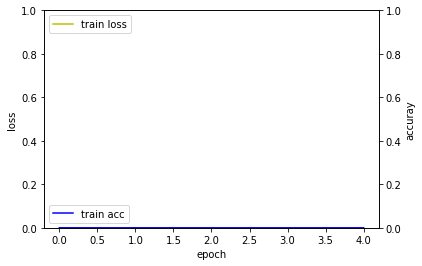

In [50]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 평가데이터 만들기

data_eval = pd.read_csv('cvt_201703.csv')

from tqdm import tqdm

# 각 거래채널별 거래건수를 합산 - 거래가 있는 경우 1 , 없으면 0
trx_cnt = list(data_eval['A0_cnt'] + data_eval['C0_cnt'] + data_eval['CK_cnt'] + data_eval['D0_cnt'] + data_eval['DT_cnt'] + data_eval['G0_cnt'])

ip_yn = []

for i in tqdm(range(len(trx_cnt))):
  if trx_cnt[i] > 0:
    ip_yn.append(1)
  else:
    ip_yn.append(0)


data_eval['ip_yn'] = ip_yn

100%|██████████| 381656/381656 [00:00<00:00, 2095263.47it/s]


In [0]:

x_test = pd.DataFrame()
y_test = pd.DataFrame()

x_test['jibul_psb_jan_1'] = data_eval['jibul_psb_jan_1']
x_test['jan_1'] = data_eval['jan_1']
x_test['bfmm_ac_jan_1'] = data_eval['bfmm_ac_jan_1']
x_test['m_avjn_1'] = data_eval['m_avjn_1']
x_test['bfmm_ac_avjn_1'] = data_eval['bfmm_ac_avjn_1']
x_test['lm3_ac_avjn'] = data_eval['lm3_ac_avjn_1']


y_test = data_eval['ip_yn']


x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()


In [0]:
# 학습모델 평가하기

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test_np, y_test_np, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))





381656/381656 [==============================] - 8s 20us/step
loss_and_metrics : [0.6552265099649331, 0.6420729756355286, 0.1078149825334549, 0.4316401779651642, 0.16440097987651825]


In [0]:
# 7. 모델 예측값 만들기
mypredict = model.predict(x_test_np)

my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i])

sub_dict = {"result":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("20200614_MLP_result1.csv", index=False, encoding='utf-8')
